### Importing Libraries

This block imports all the necessary Python libraries for data manipulation, visualization, preprocessing, and building classification models. It includes:
- **NumPy & Pandas** for numerical and tabular data handling,
- **Matplotlib** for plotting,
- **Scikit-learn** modules for model training, evaluation, preprocessing, and classification algorithms.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
df =pd.read_csv('heart.csv')

### Exploratory Data Analysis (EDA)

In this section, we explore the dataset to gain initial insights. This includes examining data types, checking for missing values, analyzing feature distributions, and identifying relationships between variables. EDA helps in understanding the underlying structure of the data before applying machine learning models.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [6]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# dublicate rows
df.duplicated().sum()

723

### Data Visualization

This section is dedicated to exploring and understanding the data through visualizations. It helps in identifying patterns, distributions, correlations, and potential outliers, which are crucial for making informed decisions during preprocessing and modeling.


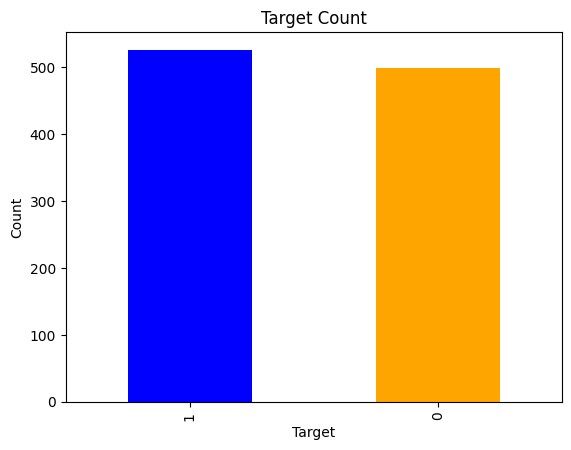

In [9]:
df['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Target Count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [10]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

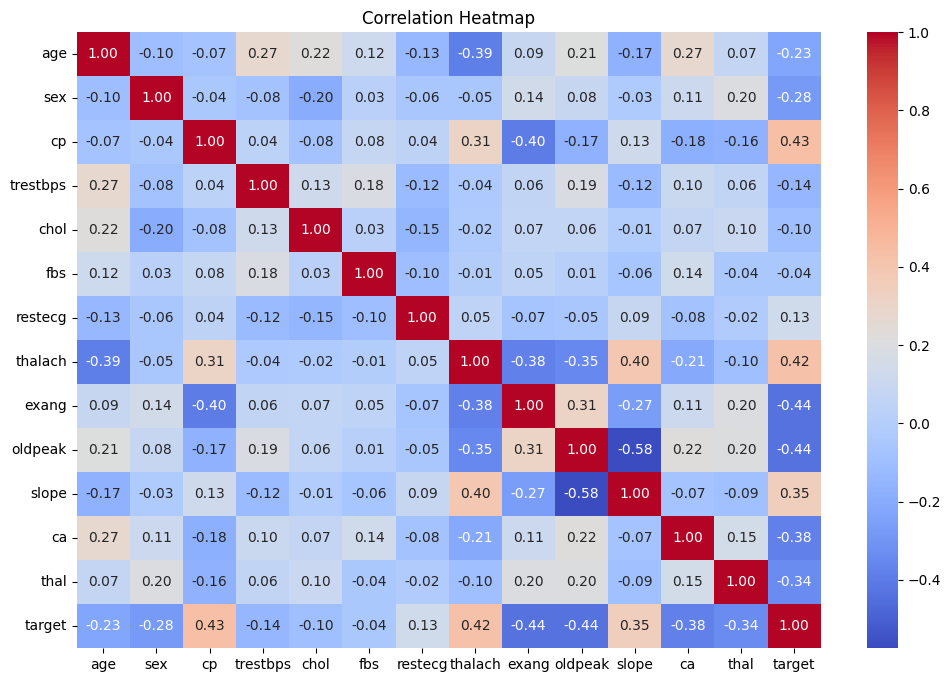

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

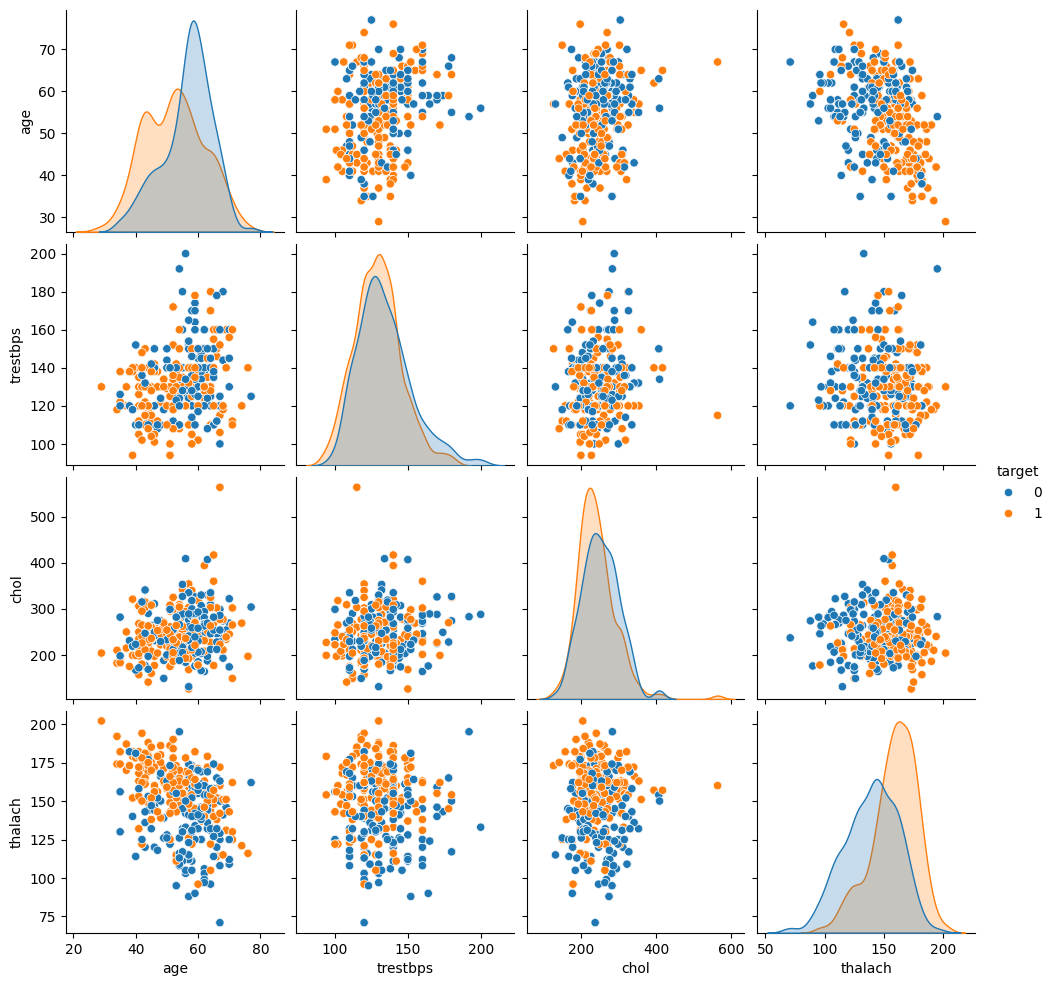

In [12]:
# Pair plot for selected features
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', diag_kind='kde')
plt.show()

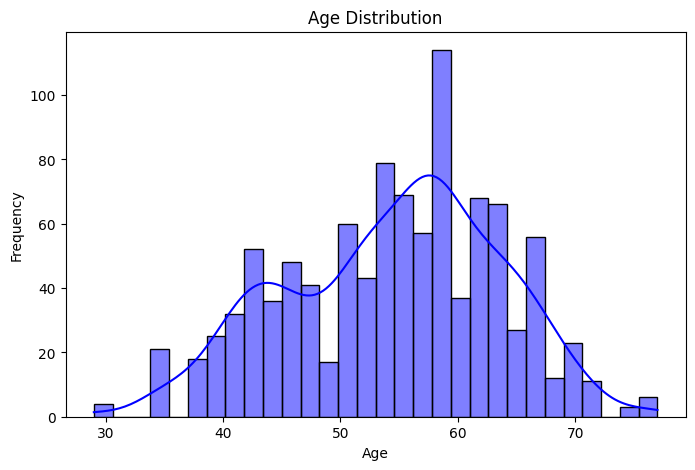

In [13]:
# Distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Outlier Detection and Treatment

This section focuses on identifying and handling outliers in the dataset. Outliers can skew the analysis and negatively impact model performance, so it's important to detect them using statistical or visualization methods and decide whether to remove or transform them.


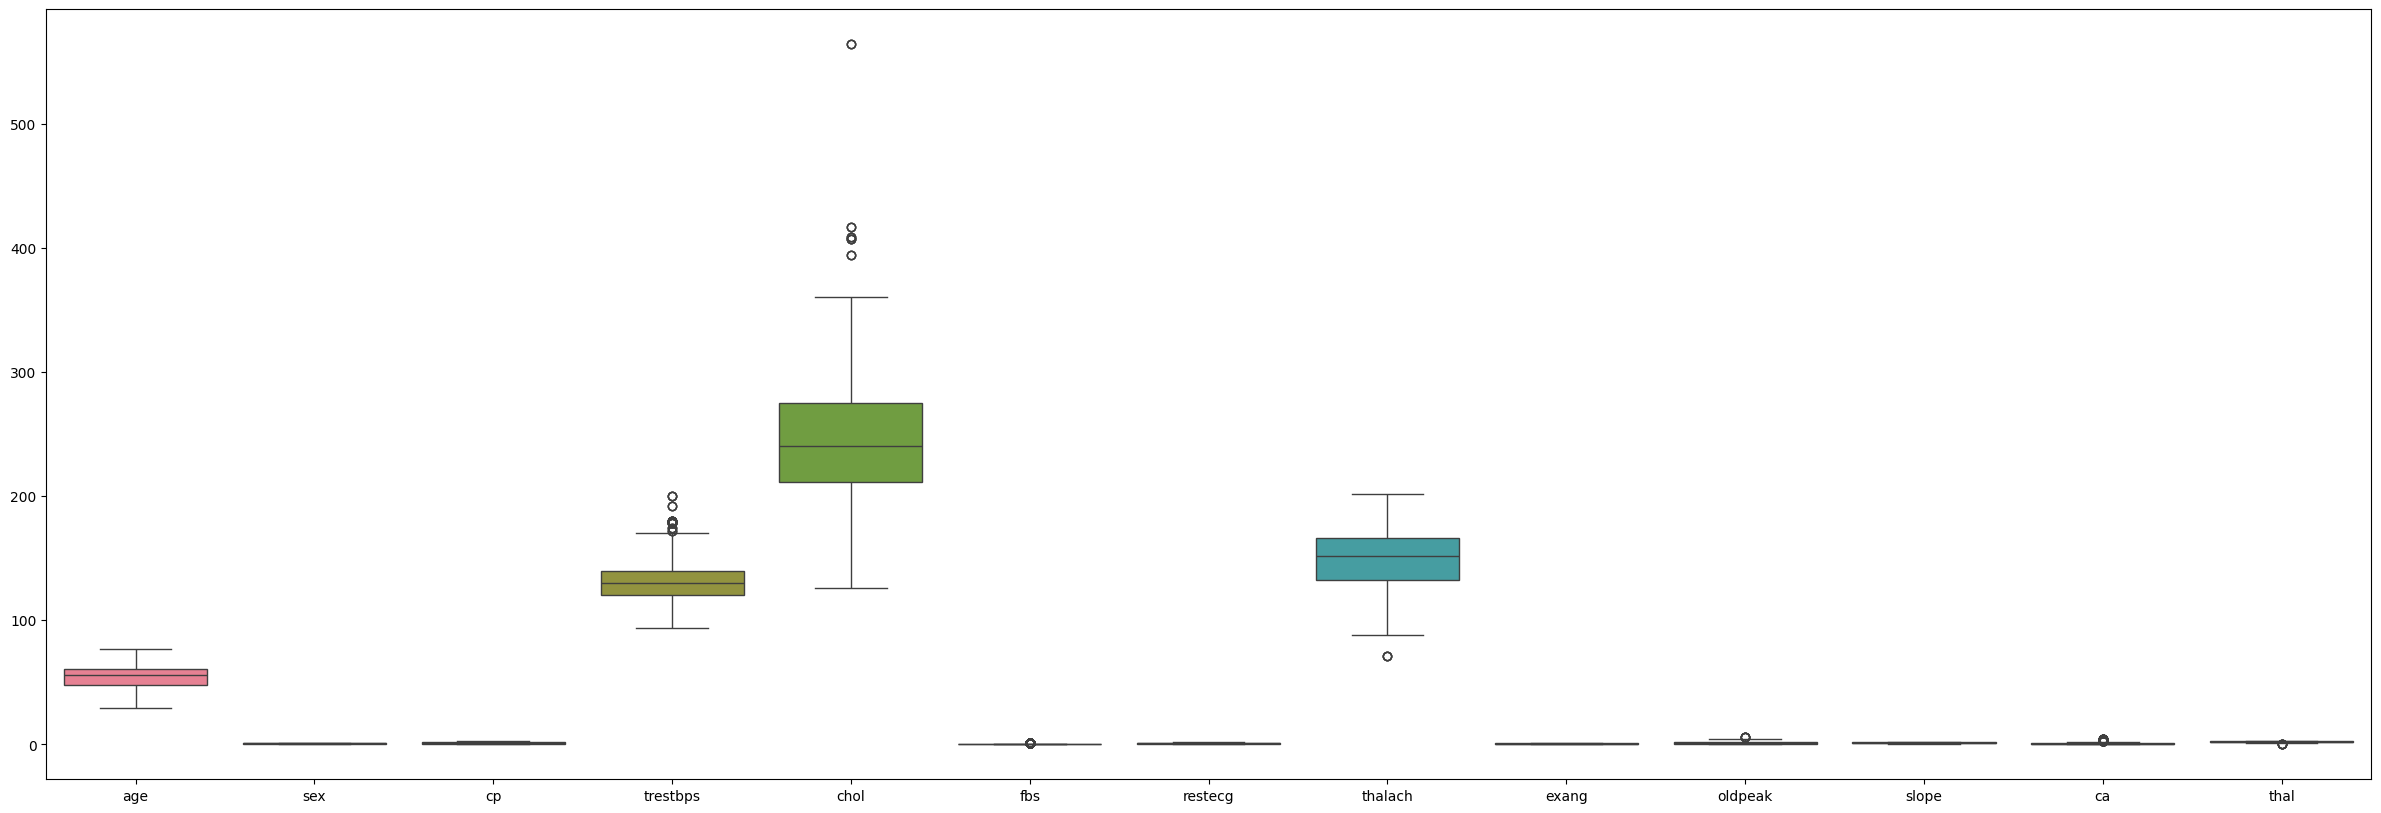

In [14]:
# box blot of all features
plt.figure(figsize=(30,10))
sns.boxplot(data=df.drop('target', axis=1))
plt.show()

In [15]:
#count of outliers in each feature
for col in df.drop('target', axis=1).columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f'{col}: {len(outliers)}')

age: 0
sex: 0
cp: 0
trestbps: 30
chol: 16
fbs: 153
restecg: 0
thalach: 4
exang: 0
oldpeak: 7
slope: 0
ca: 87
thal: 7


In [16]:
# delete outliers
for col in df.drop('target', axis=1).columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  print(f'{col}: {len(outliers)}')
  print(df.shape)

age: 7
(1025, 14)
sex: 7
(1025, 14)
cp: 7
(1025, 14)
trestbps: 7
(995, 14)
chol: 7
(979, 14)
fbs: 7
(843, 14)
restecg: 7
(843, 14)
thalach: 7
(839, 14)
exang: 7
(839, 14)
oldpeak: 7
(832, 14)
slope: 7
(832, 14)
ca: 7
(772, 14)
thal: 7
(769, 14)


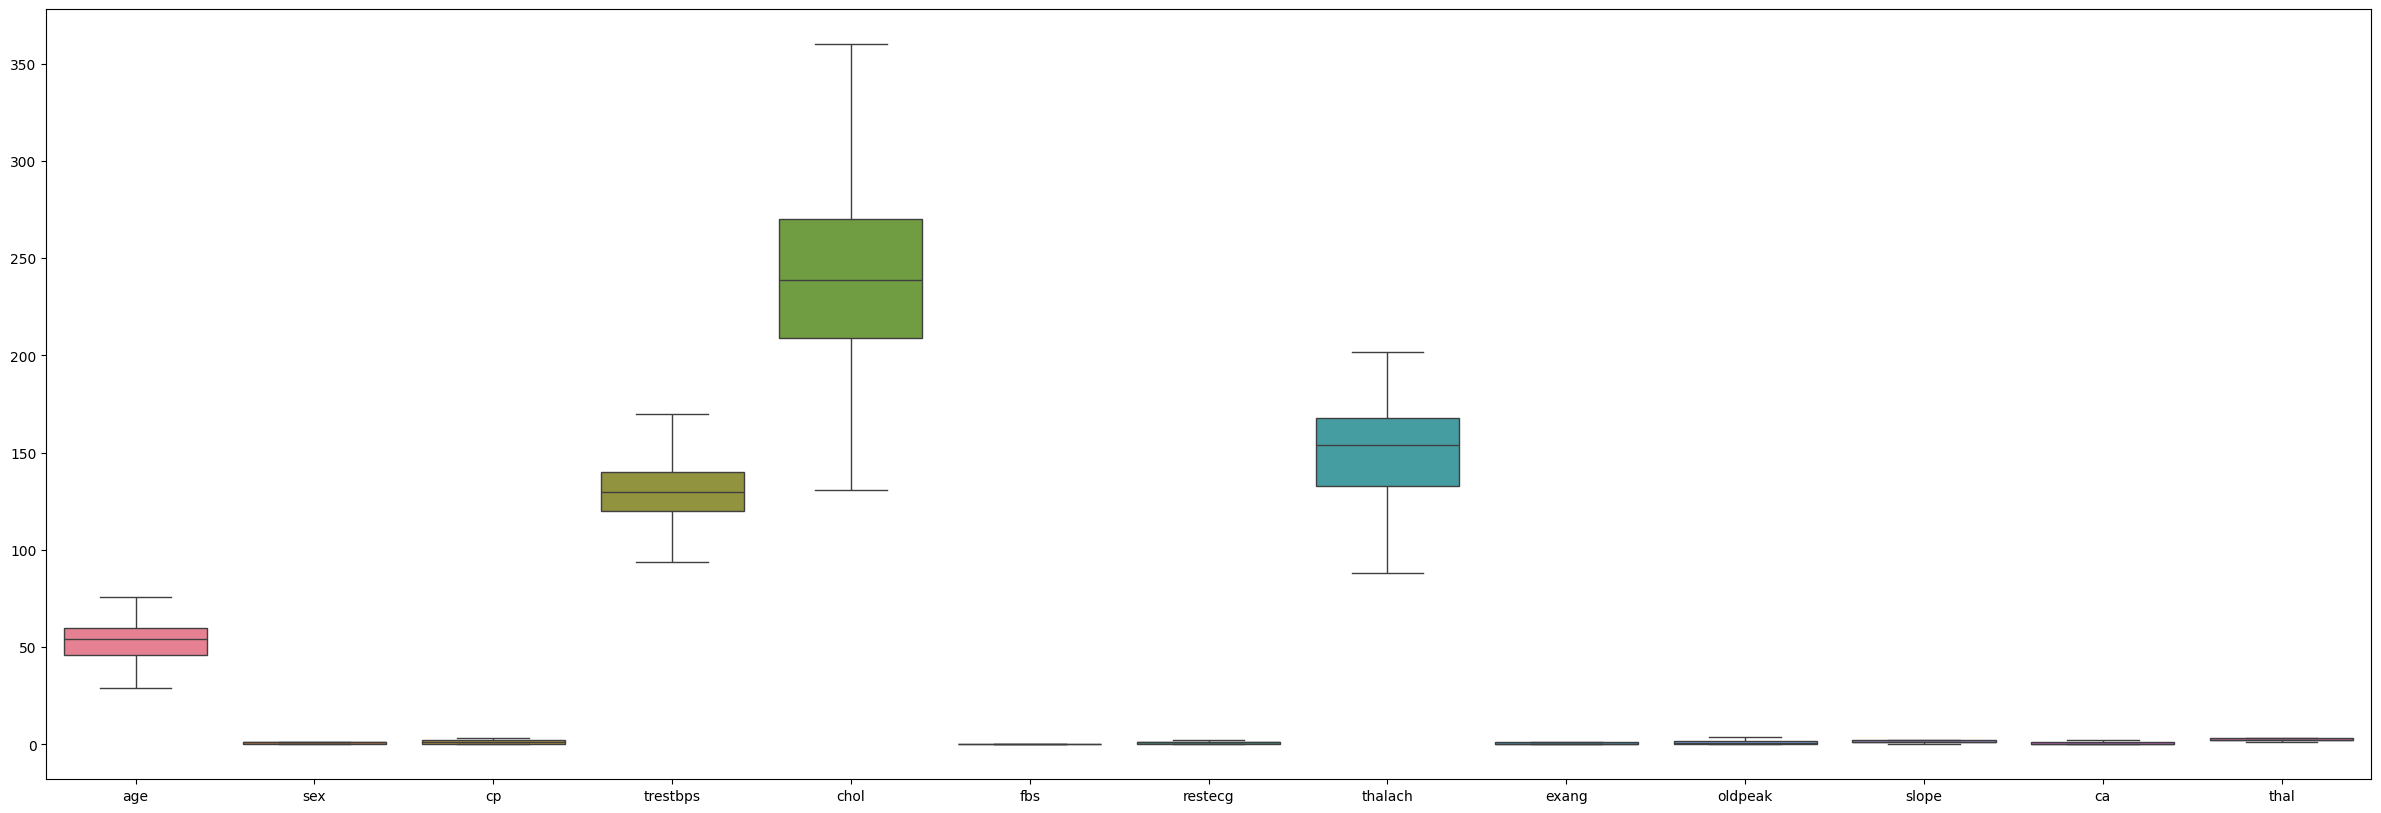

In [17]:
# box blot again
plt.figure(figsize=(30,10))
sns.boxplot(data=df.drop('target', axis=1))
plt.show()

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Standardization

Standardization scales the features to have a mean of 0 and a standard deviation of 1. This step is essential for many machine learning algorithms (like SVM and KNN) that are sensitive to the scale of input data.


In [19]:
scaler = StandardScaler()
x = df.drop('target', axis=1)
y = df['target']
x=scaler.fit_transform(x)

###  **Train-Test Split**
Split the dataset into training and testing sets (80% train, 20% test).

In [20]:
# train & test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Build the Model

In this section, we define and train the machine learning model. Based on the preprocessed data, different classifiers like Logistic Regression, Decision Tree, Random Forest, etc., are implemented to evaluate their performance on the given task.


In [21]:
# Build the model
model1 = LogisticRegression()
model1.fit(x_train, y_train)

# Predict
y_pred1 = model1.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1 Score:", f1_score(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Accuracy: 0.8571428571428571
Precision: 0.8469387755102041
Recall: 0.9222222222222223
F1 Score: 0.8829787234042553

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82        64
           1       0.85      0.92      0.88        90

    accuracy                           0.86       154
   macro avg       0.86      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154


Confusion Matrix:
 [[49 15]
 [ 7 83]]


In [22]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

# Predict
y_pred2 = model2.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        90

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154


Confusion Matrix:
 [[64  0]
 [ 0 90]]


In [23]:
# Cross-validation
scores = cross_val_score(model2, x_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Average score: {scores.mean()}")

Cross-validation scores: [0.97560976 0.96747967 0.96747967 0.96747967 0.98373984]
Average score: 0.9723577235772357


In [24]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

# Predict
y_pred3 = model3.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))
print("Recall:", recall_score(y_test, y_pred3))
print("F1 Score:", f1_score(y_test, y_pred3))
print("\n Classification Report:\n", classification_report(y_test, y_pred3))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        90

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154


 Confusion Matrix:
 [[64  0]
 [ 0 90]]


In [25]:
# Build the model
model4 = SVC()
model4.fit(x_train, y_train)

# Predict
y_pred4 = model4.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Precision:", precision_score(y_test, y_pred4))
print("Recall:", recall_score(y_test, y_pred4))
print("F1 Score:", f1_score(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))

Accuracy: 0.935064935064935
Precision: 0.925531914893617
Recall: 0.9666666666666667
F1 Score: 0.9456521739130435
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.93      0.97      0.95        90

    accuracy                           0.94       154
   macro avg       0.94      0.93      0.93       154
weighted avg       0.94      0.94      0.93       154

Confusion Matrix:
 [[57  7]
 [ 3 87]]


In [26]:
# Build the model
model5 = KNeighborsClassifier()
model5.fit(x_train, y_train)

# Predict
y_pred5 = model5.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Precision:", precision_score(y_test, y_pred5))
print("Recall:", recall_score(y_test, y_pred5))
print("F1 Score:", f1_score(y_test, y_pred5))
print("Classification Report:\n", classification_report(y_test, y_pred5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred5))

Accuracy: 0.8701298701298701
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.89      0.89      0.89        90

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154

Confusion Matrix:
 [[54 10]
 [10 80]]


In [27]:
# svaing best models
import joblib
joblib.dump(model2, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Build System for Prediction from User Input

This section sets up the prediction system where the user can input data, and the model will provide predictions based on previously trained and saved models. The system loads the saved model, processes the user input, and generates an output accordingly. It demonstrates how to make real-time predictions with a trained machine learning model.


In [28]:
model = joblib.load('heart_disease_model.pkl')
scaler = joblib.load('scaler.pkl')
# build system
# input features as list
input_data =np.array([[66.0, 0.0, 2.0, 146.0, 278.0, 0.0, 0.0, 152.0, 0.0, 0.0, 1.0, 1.0, 2.0]]) 
input_data_scaled = scaler.transform(input_data)
prediction = model.predict(input_data_scaled)
if prediction[0] == 1:
  print('The patient has a heart disease.')
else:
  print('The patient does not have a heart disease.')

The patient has a heart disease.


C:\Users\HP Elite BOOK\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
print(model.n_features_in_)  
print(scaler.n_features_in_)  

13
13


In [30]:
# print random row record has target = 1
df[df['target'] == 1].sample(1).values.tolist()

[[64.0, 1.0, 3.0, 110.0, 211.0, 0.0, 0.0, 144.0, 1.0, 1.8, 1.0, 0.0, 2.0, 1.0]]

In [31]:
from joblib import dump

# Save the model
dump(model2, 'heart_model.joblib')

# Save the scaler
dump(scaler, 'heart_scaler.joblib')

['heart_scaler.joblib']